# Segment tests

## 1. Check classes

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from importlib import reload
import shapely
import segment_geometry as sg


In [3]:
a = sg.Pt(10.10, 10.10)
b = sg.Pt(10.10, 20.10)
c = sg.Pt(100, 100)
d = sg.Pt(10.10, 10.11)
e = sg.Pt(10.10, 10.12)
f = sg.Pt(10.11, 10.11)
g = sg.Pt(10.11, 20.10)
h = sg.Pt(10.10, 100)
pt_list = [a, b, c, d, e, f, g, h]

In [4]:
a.to_shapely.distance(b.to_shapely)

10.000000000000002

In [5]:
for pt in pt_list:
    print(a.is_approx_eq(pt), a.distance(b))


True 10.000000000000002
False 10.000000000000002
False 10.000000000000002
True 10.000000000000002
False 10.000000000000002
False 10.000000000000002
False 10.000000000000002
False 10.000000000000002


In [6]:
a1 = sg.Pt(0, 0)
a2 = sg.Pt(0.01, 0)
a3 = sg.Pt(0.01, 0.01)
print(a1.is_approx_eq(a2), a1.is_approx_eq(a3), a2.is_approx_eq(a3))

True False True


In [7]:
ab = sg.Segment(a, b)
ac = sg.Segment(a, c)
ag = sg.Segment(a, g)
db = sg.Segment(d, b)
eb = sg.Segment(e, b)
fb = sg.Segment(f, b)
dg = sg.Segment(d, g)
eg = sg.Segment(e, g)
fg = sg.Segment(f, g)
fc = sg.Segment(f, c)
ah = sg.Segment(a, h)
hc = sg.Segment(h, c)
seg_dic = {
    "ab": ab,
    "ac": ac,
    "ag": ag,
    "db": db,
    "eb": eb,
    "fb": fb,
    "dg": dg,
    "eg": eg,
    "fg": fg,
    "fc": fc,
    "ah": ah,
    "hc": hc,
}

In [8]:
for seg_name, seg in seg_dic.items():
    print(
        f"ab/{seg_name} ==:{ab.is_approx_eq(seg)} \t/:{ab.is_parallel(seg)}\tT:{ab.is_orthogonal(seg)}\tin:{ab.contains(seg)}\t"
    )

ab/ab ==:True 	/:True	T:False	in:False	
ab/ac ==:False 	/:False	T:False	in:False	
ab/ag ==:True 	/:True	T:False	in:False	
ab/db ==:True 	/:True	T:False	in:False	
ab/eb ==:False 	/:True	T:False	in:False	
ab/fb ==:False 	/:True	T:False	in:False	
ab/dg ==:True 	/:True	T:False	in:False	
ab/eg ==:False 	/:True	T:False	in:False	
ab/fg ==:False 	/:True	T:False	in:False	
ab/fc ==:False 	/:False	T:False	in:False	
ab/ah ==:False 	/:True	T:False	in:False	
ab/hc ==:False 	/:False	T:True	in:False	


In [9]:
ab.vector

array([ 0., 10.])

In [10]:
fg.vector

array([0.  , 9.99])

In [11]:
import numpy as np

np.dot(ab.vector, fg.vector)

np.float64(99.90000000000003)

In [12]:
ab.length * fg.length

np.float64(99.90000000000003)

In [13]:
np.dot(ab.vector, ac.vector)

np.float64(899.0000000000002)

In [14]:
ab.length * ac.length

np.float64(1271.3779925734127)

In [15]:
for pt in pt_list:
    print(ab.contains(pt))

False
False
False
False
True
True
False
False


In [16]:
i = sg.Pt(10.1, 40)
ah.contains(i)

np.True_

In [17]:
ab.contains(sg.Segment(b, i))

False

In [19]:
bi = sg.Segment(b, i)
bi

Segment(Pt(10.1, 20.1), Pt(10.1, 40))

In [20]:
ah.contains(bi)

np.True_

In [21]:
ah

Segment(Pt(10.1, 10.1), Pt(10.1, 100))

In [ ]:
import shapely

ab_s = shapely.geometry.LineString([a, b])
type(ab_s)

shapely.geometry.linestring.LineString

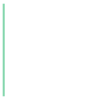

In [24]:
ab_s

In [25]:
ab_o = sg.Segment(a, b)
type(ab_o)

segment_geometry.Segment

In [26]:
ab_s.coords

In [27]:
# Unit test
a = sg.Pt(0, 0)
a_ = sg.Pt(0, 0.01)
b = sg.Pt(10, 0)
b_ = sg.Pt(10, 0.01)
c = sg.Pt(20, 0)
c_ = sg.Pt(20, -0.01)
d = sg.Pt(10, 10)
e = sg.Pt(20, 10)
f = sg.Pt(10, 20)
g = sg.Pt(30, 0)
h = sg.Pt(0, 20)
all_points = {
    "a": a,
    "a_": a_,
    "b": b,
    "b_": b_,
    "c": c,
    "c_": c_,
    "d": d,
    "e": e,
    "f": f,
    "g": g,
    "h": h,
}

# Create all segments
all_segments = {
    f"{k1}{k2}": sg.Segment(v1, v2)
    for k1, v1 in all_points.items()
    for k2, v2 in all_points.items()
    if k1 != k2
}
all_segments

{'aa_': Segment(Pt(0, 0), Pt(0, 0.01)),
 'ab': Segment(Pt(0, 0), Pt(10, 0)),
 'ab_': Segment(Pt(0, 0), Pt(10, 0.01)),
 'ac': Segment(Pt(0, 0), Pt(20, 0)),
 'ac_': Segment(Pt(0, 0), Pt(20, -0.01)),
 'ad': Segment(Pt(0, 0), Pt(10, 10)),
 'ae': Segment(Pt(0, 0), Pt(20, 10)),
 'af': Segment(Pt(0, 0), Pt(10, 20)),
 'ag': Segment(Pt(0, 0), Pt(30, 0)),
 'ah': Segment(Pt(0, 0), Pt(0, 20)),
 'a_a': Segment(Pt(0, 0.01), Pt(0, 0)),
 'a_b': Segment(Pt(0, 0.01), Pt(10, 0)),
 'a_b_': Segment(Pt(0, 0.01), Pt(10, 0.01)),
 'a_c': Segment(Pt(0, 0.01), Pt(20, 0)),
 'a_c_': Segment(Pt(0, 0.01), Pt(20, -0.01)),
 'a_d': Segment(Pt(0, 0.01), Pt(10, 10)),
 'a_e': Segment(Pt(0, 0.01), Pt(20, 10)),
 'a_f': Segment(Pt(0, 0.01), Pt(10, 20)),
 'a_g': Segment(Pt(0, 0.01), Pt(30, 0)),
 'a_h': Segment(Pt(0, 0.01), Pt(0, 20)),
 'ba': Segment(Pt(10, 0), Pt(0, 0)),
 'ba_': Segment(Pt(10, 0), Pt(0, 0.01)),
 'bb_': Segment(Pt(10, 0), Pt(10, 0.01)),
 'bc': Segment(Pt(10, 0), Pt(20, 0)),
 'bc_': Segment(Pt(10, 0), Pt(20, -0

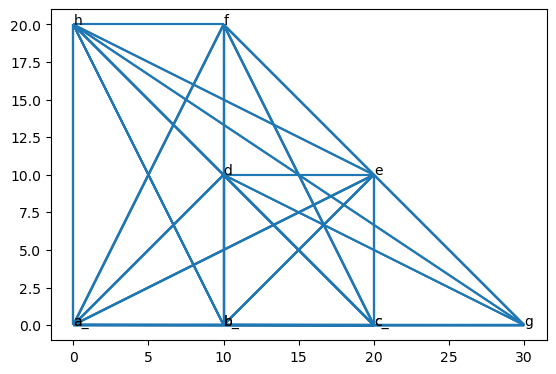

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

ax = gpd.GeoSeries([s.line for s in all_segments.values()]).plot()
ax.set_aspect("equal")
for k, pt in all_points.items():
    plt.text(pt.x, pt.y, k)
plt.show()

In [ ]:
all_segments["ab"].line.coords

In [40]:
for seg_name, seg in all_segments.items():
    for seg_name2, seg2 in all_segments.items():
        print(
            f"{seg_name}/{seg_name2} ==:{seg.is_approx_eq(seg2)} \t/:{seg.is_parallel(seg2)}\tT:{seg.is_orthogonal(seg2)}\tin:{seg.contains(seg2)}\t"
        )

aa_/aa_ ==:True 	/:True	T:False	in:False	
aa_/ab ==:False 	/:False	T:True	in:False	
aa_/ab_ ==:False 	/:False	T:False	in:False	
aa_/ac ==:False 	/:False	T:True	in:False	
aa_/ac_ ==:False 	/:False	T:False	in:False	
aa_/ad ==:False 	/:False	T:False	in:False	
aa_/ae ==:False 	/:False	T:False	in:False	
aa_/af ==:False 	/:False	T:False	in:False	
aa_/ag ==:False 	/:False	T:True	in:False	
aa_/ah ==:False 	/:True	T:False	in:False	
aa_/a_a ==:True 	/:True	T:False	in:False	
aa_/a_b ==:False 	/:False	T:False	in:False	
aa_/a_b_ ==:False 	/:False	T:True	in:False	
aa_/a_c ==:False 	/:False	T:False	in:False	
aa_/a_c_ ==:False 	/:False	T:False	in:False	
aa_/a_d ==:False 	/:False	T:False	in:False	
aa_/a_e ==:False 	/:False	T:False	in:False	
aa_/a_f ==:False 	/:False	T:False	in:False	
aa_/a_g ==:False 	/:False	T:False	in:False	
aa_/a_h ==:False 	/:True	T:False	in:False	
aa_/ba ==:False 	/:False	T:True	in:False	
aa_/ba_ ==:False 	/:False	T:False	in:False	
aa_/bb_ ==:False 	/:True	T:False	in:False	
aa_/bc

In [99]:
from matplotlib.lines import Line2D


def check_relations(ref_seg_name, all_segments):
    # Check segments relations
    fig, ax = plt.subplots()
    # ax = gpd.GeoSeries([s.line for s in all_segments.values()]).plot(linestyle=".")
    ax.set_aspect("equal")
    for k, pt in all_points.items():
        plt.text(pt.x, pt.y, k)
    ref = all_segments[ref_seg_name]
    alpha = 0.5
    ax.plot(*ref.line.xy, color="black", label="base", linewidth=2)
    parallels = []
    orthos = []
    contains = []
    adjacents = []
    for seg_name, seg in all_segments.items():
        if ref.is_parallel(seg):
            ax.plot(*seg.line.xy, color="red", linestyle="dotted")
            parallels.append(seg_name)
        if ref.is_orthogonal(seg):
            ax.plot(
                *seg.line.xy, color="green", linestyle="dashed", alpha=alpha
            )
            orthos.append(seg_name)
        if ref.contains(seg):
            ax.plot(
                *seg.line.xy, color="blue", linestyle="dashdot", alpha=alpha
            )
            contains.append(seg_name)
        if ref.is_line_adjacent(seg):
            ax.plot(
                *seg.line.xy, color="coral", linestyle="dotted", alpha=alpha
            )
            adjacents.append(seg_name)
    ax.set_title(f"Carac from {ref_seg_name}")
    legend_elements = [
        Line2D([0], [0], color="black", lw=2, label="ref"),
        Line2D([0], [0], color="red", linestyle="dotted", label="parallel"),
        Line2D([0], [0], color="green", linestyle="dashed", label="ortho"),
        Line2D([0], [0], color="blue", linestyle="dashdot", label="contains"),
        Line2D([0], [0], color="coral", linestyle="dotted", label="adjacent"),
    ]
    ax.legend(handles=legend_elements)
    plt.show()
    print("Parallels:", parallels)
    print("Orthos:", orthos)
    print("Contains:", contains)
    print("Adjacents:", adjacents)

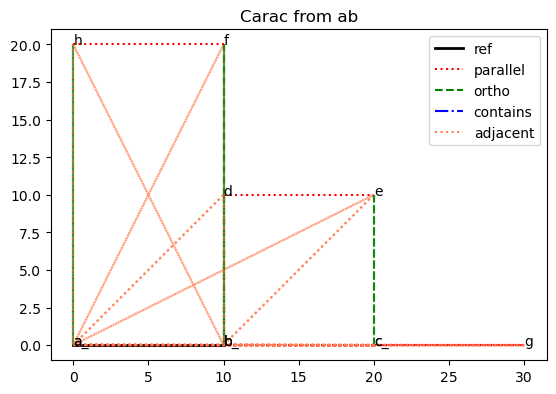

Parallels: ['ab', 'ab_', 'ac', 'ac_', 'ag', 'a_b', 'a_b_', 'a_c', 'a_c_', 'a_g', 'bc', 'bc_', 'bg', 'b_c', 'b_c_', 'b_g', 'cg', 'c_g', 'de', 'hf']
Orthos: ['aa_', 'ah', 'a_a', 'a_h', 'bb_', 'bd', 'bf', 'b_b', 'b_d', 'b_f', 'cc_', 'ce', 'c_c', 'c_e', 'db', 'db_', 'df', 'ec', 'ec_', 'fb', 'fb_', 'fd', 'ha', 'ha_']
Contains: []
Adjacents: ['ac', 'ac_', 'ad', 'ae', 'af', 'ag', 'ah', 'a_c', 'a_c_', 'a_d', 'a_e', 'a_f', 'a_g', 'a_h', 'bc', 'bc_', 'bd', 'be', 'bf', 'bg', 'bh', 'b_c', 'b_c_', 'b_d', 'b_e', 'b_f', 'b_g', 'b_h', 'ca', 'ca_', 'cb', 'cb_', 'c_a', 'c_a_', 'c_b', 'c_b_', 'da', 'da_', 'db', 'db_', 'ea', 'ea_', 'eb', 'eb_', 'fa', 'fa_', 'fb', 'fb_', 'ga', 'ga_', 'gb', 'gb_', 'ha', 'ha_', 'hb', 'hb_']


In [100]:
check_relations("ab", all_segments)

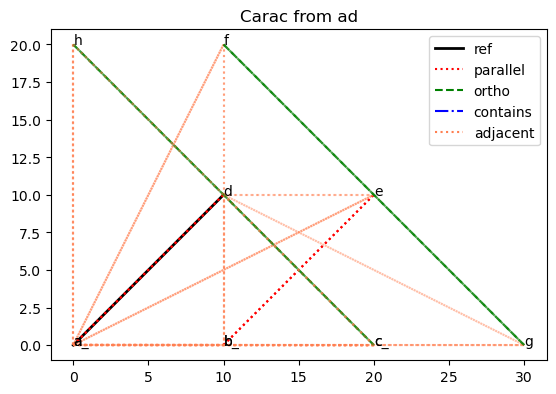

Parallels: ['ad', 'a_d', 'be', 'b_e']
Orthos: ['cd', 'ch', 'dc', 'dh', 'ef', 'eg', 'fe', 'fg', 'ge', 'gf', 'hc', 'hd']
Contains: []
Adjacents: ['ab', 'ab_', 'ac', 'ac_', 'ae', 'af', 'ag', 'ah', 'a_b', 'a_b_', 'a_c', 'a_c_', 'a_e', 'a_f', 'a_g', 'a_h', 'ba', 'ba_', 'bd', 'b_a', 'b_a_', 'b_d', 'ca', 'ca_', 'cd', 'c_a', 'c_a_', 'c_d', 'db', 'db_', 'dc', 'dc_', 'de', 'df', 'dg', 'dh', 'ea', 'ea_', 'ed', 'fa', 'fa_', 'fd', 'ga', 'ga_', 'gd', 'ha', 'ha_', 'hd']


In [101]:
check_relations("ad", all_segments)

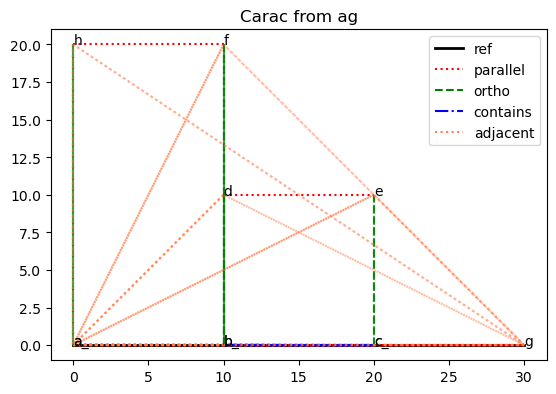

Parallels: ['ab', 'ab_', 'ac', 'ac_', 'ag', 'a_b', 'a_b_', 'a_c', 'a_c_', 'a_g', 'bc', 'bc_', 'bg', 'b_c', 'b_c_', 'b_g', 'cg', 'c_g', 'de', 'hf']
Orthos: ['aa_', 'ah', 'a_a', 'a_h', 'bb_', 'bd', 'bf', 'b_b', 'b_d', 'b_f', 'cc_', 'ce', 'c_c', 'c_e', 'db', 'db_', 'df', 'ec', 'ec_', 'fb', 'fb_', 'fd', 'ha', 'ha_']
Contains: ['bb_', 'bc', 'bc_', 'b_b', 'b_c', 'b_c_', 'cb', 'cb_', 'cc_', 'c_b', 'c_b_', 'c_c']
Adjacents: ['ab', 'ab_', 'ac', 'ac_', 'ad', 'ae', 'af', 'ah', 'a_b', 'a_b_', 'a_c', 'a_c_', 'a_d', 'a_e', 'a_f', 'a_h', 'ba', 'ba_', 'bg', 'b_a', 'b_a_', 'b_g', 'ca', 'ca_', 'cg', 'c_a', 'c_a_', 'c_g', 'da', 'da_', 'dg', 'ea', 'ea_', 'eg', 'fa', 'fa_', 'fg', 'gb', 'gb_', 'gc', 'gc_', 'gd', 'ge', 'gf', 'gh', 'ha', 'ha_', 'hg']


In [102]:
check_relations("ag", all_segments)

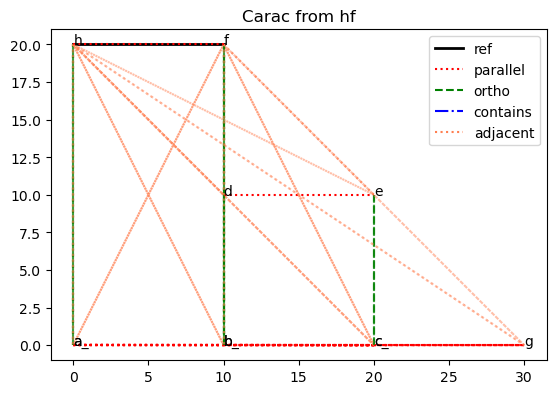

Parallels: ['ab', 'ab_', 'ac', 'ac_', 'ag', 'a_b', 'a_b_', 'a_c', 'a_c_', 'a_g', 'bc', 'bc_', 'bg', 'b_c', 'b_c_', 'b_g', 'cg', 'c_g', 'de', 'hf']
Orthos: ['aa_', 'ah', 'a_a', 'a_h', 'bb_', 'bd', 'bf', 'b_b', 'b_d', 'b_f', 'cc_', 'ce', 'c_c', 'c_e', 'db', 'db_', 'df', 'ec', 'ec_', 'fb', 'fb_', 'fd', 'ha', 'ha_']
Contains: []
Adjacents: ['af', 'ah', 'a_f', 'a_h', 'bf', 'bh', 'b_f', 'b_h', 'cf', 'ch', 'c_f', 'c_h', 'df', 'dh', 'ef', 'eh', 'fa', 'fa_', 'fb', 'fb_', 'fc', 'fc_', 'fd', 'fe', 'fg', 'gf', 'gh', 'ha', 'ha_', 'hb', 'hb_', 'hc', 'hc_', 'hd', 'he', 'hg']


In [103]:
check_relations("hf", all_segments)